In [1]:
# coding: utf-8
import pandas as pd
from math import log
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.preprocessing import StandardScaler, MaxAbsScaler
%matplotlib inline

### Loading the dataframes

Fill dict `df_dict` with dataframes with keys: *book_name*, e.g. *aubonheurdesdames_gender_nosolo*

In [76]:
books = ['aubonheurdesdames', 'candide', 'lassommoir', 'letourdumondeen80jours', 'madamebovary']
gender_names = ['gender_nosolo', 'gender_solo', 'gender_nosolo_w', 'gender_solo_w']
sentiment_names = ['sentiment_nosolo', 'sentiment_solo']
job_names = ['count_full_const', 'count_full_decr', 'count_expo_const', 'count_expo_decr', 
            'proximity_full_const', 'proximity_full_decr', 'proximity_expo_const', 'proximity_expo_decr',
            'job_full_const', 'job_full_decr', 'job_expo_const', 'job_expo_decr']
frame_names = job_names + gender_names + sentiment_names
suffix = '.csv'
path = 'metadata/'
pred_col = ['count', 'proximity', 'job']


df_dict = {}

def load_frames():
    for b in books:
        for name in frame_names:
            file = path + b + '_' + name + suffix 
            key = b + '_' + name
            df_dict[key] = pd.read_csv(file)
            df_dict[key].drop('Unnamed: 0', axis=1, inplace=True)

            predictor = name.split('_')[0]
            if predictor in pred_col:
                df_dict[key]['Predictor'] = predictor

load_frames()

## Job


In [77]:
job_cols = df_dict['aubonheurdesdames_count_full_const'].columns
# sentiment_cols = df_dict['letourdumondeen80jours_sentiment_nosolo'].columns

In [78]:
palette = sns.color_palette()
sns.set_style('whitegrid')

In [79]:
def char_similarity(df, name='', character=''):
    if name:
        # Use mean of col 
        df = df_dict[name]
        df = df.fillna(df.mean())
    if character:
        df = df[df.Character == character]
        
    df = df.groupby(['Rank'])['Similarity'].mean().to_frame()
        
    return df

### WINDOW = 5

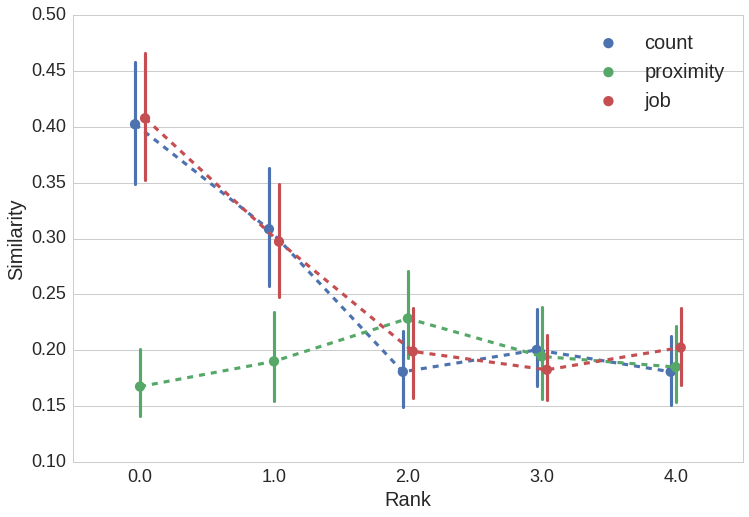

In [84]:
df1 = pd.DataFrame(columns=job_cols)
df2 = pd.DataFrame(columns=job_cols)
df3 = pd.DataFrame(columns=job_cols)
plot_names = ['_count_full_decr', '_proximity_full_decr', '_job_full_decr']

for book in books: 
    df1 = df1.append(df_dict[book+plot_names[0]])
    df2 = df2.append(df_dict[book+plot_names[1]])
    df3 = df3.append(df_dict[book+plot_names[2]])

df1 = df1.fillna(df1.mean())
df2 = df2.fillna(df2.mean())
df3 = df3.fillna(df3.mean())

df = df1.append(df2)
df = df.append(df3)

fig, ax = plt.subplots(figsize=(12,8))

sns.pointplot(x='Rank', y="Similarity", hue="Predictor", linestyles='--', data=df, dodge=True)
ax.legend(fontsize=20)
plt.xlabel('Rank', fontsize=20)
plt.ylabel('Similarity', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18);

In [81]:
len(df.Character.unique())

108

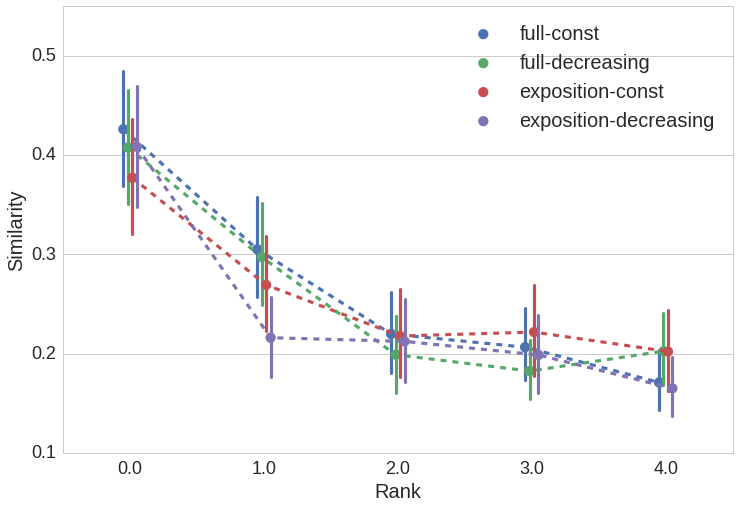

In [82]:
df1 = pd.DataFrame(columns=job_cols)
df2 = pd.DataFrame(columns=job_cols)
df3 = pd.DataFrame(columns=job_cols)
df4 = pd.DataFrame(columns=job_cols)
plot_names = ['_job_full_const','_job_full_decr', '_job_expo_const', '_job_expo_decr']

for book in books: 
    df1 = df1.append(df_dict[book+plot_names[0]])
    df2 = df2.append(df_dict[book+plot_names[1]])
    df3 = df3.append(df_dict[book+plot_names[2]])
    df4 = df4.append(df_dict[book+plot_names[3]])


df1 = df1.fillna(df1.mean())
df2 = df2.fillna(df2.mean())
df3 = df3.fillna(df3.mean())
df4 = df4.fillna(df4.mean())


df1['Predictor'] = 'full-const'
df2['Predictor'] = 'full-decreasing'
df3['Predictor'] = 'exposition-const'
df4['Predictor'] = 'exposition-decreasing'


df = df1.append(df2)
df = df.append(df3)
df = df.append(df4)

fig, ax = plt.subplots(figsize=(12,8))

sns.pointplot(x='Rank', y="Similarity", hue="Predictor", data=df, linestyles='--', dodge=True)

ax.legend(fontsize=20)
plt.xlabel('Rank', fontsize=20)
plt.ylabel('Similarity', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18);

In [51]:
df1 = df1[df1.Rank < 5]
len(df1[df1.Similarity == 1.0].Character.unique())

58

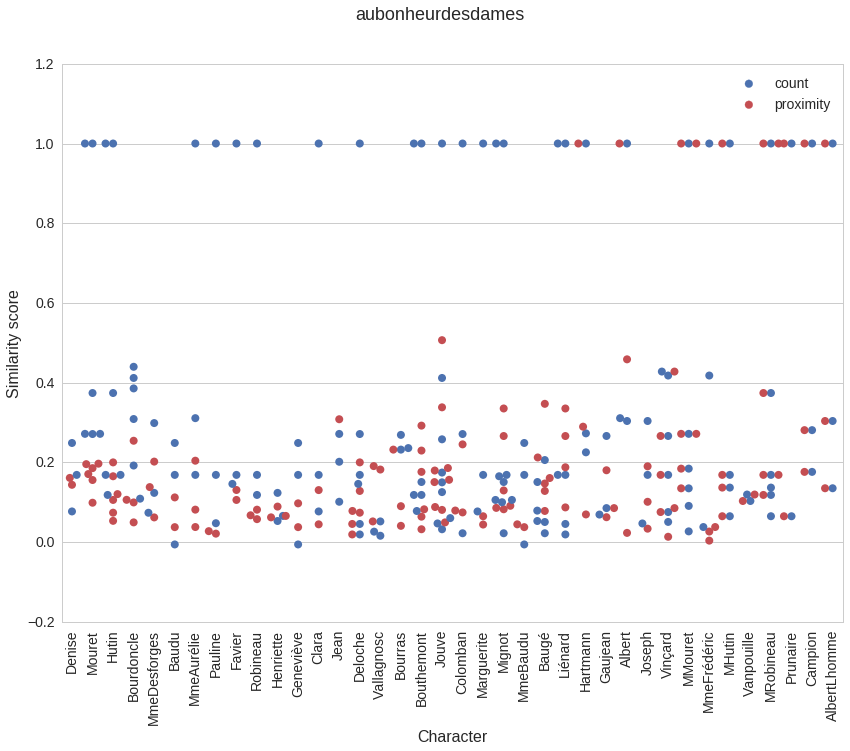

In [10]:
book = 'aubonheurdesdames'
name1 = book + '_count_full_const'
name2 = book + '_proximity_full_const'

plotter = df_dict[name1].append(df_dict[name2])
plotter = plotter[plotter.Rank < 3]
fig, ax = plt.subplots(figsize=(14,10))

sns.swarmplot(
    x='Character',
    y='Similarity',
    hue='Predictor',
    palette={'count': palette[0], 'proximity': palette[2]},
    data=plotter,
    ax=ax, 
    size=8)
plt.xticks(rotation=90)
plt.suptitle(book, fontsize=18)
ax.legend(
   loc='best',
   fontsize=14)
ax.tick_params(labelsize=14)
plt.xlabel('Character', fontsize=16)
plt.ylabel('Similarity score', fontsize=16)
plt.show()

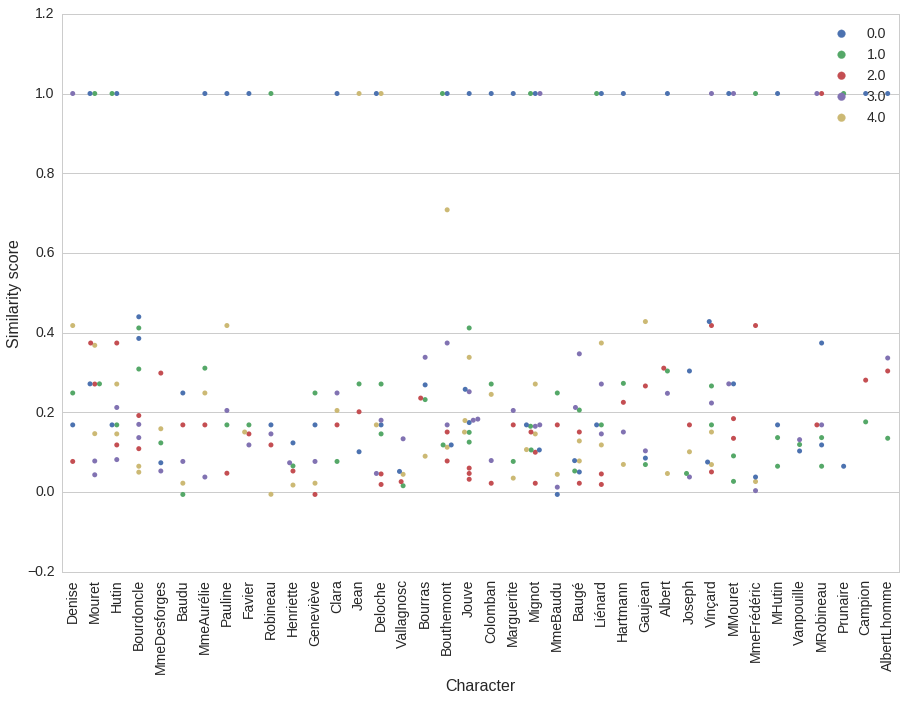

In [11]:
fig, ax = plt.subplots(figsize=(15,10))
book = 'aubonheurdesdames'
name = book + '_count_full_const'
sns.swarmplot(
    x='Character',
    y='Similarity',
    data=df_dict[name],
    hue='Rank',
    ax=ax)
ax.legend(
   loc='best',
   fontsize=14)
ax.tick_params(labelsize=14)
plt.xlabel('Character', fontsize=16)
plt.ylabel('Similarity score', fontsize=16)
plt.xticks(rotation=90)
plt.show()

## Gender

In [12]:
load_frames()

In [13]:
gender_cols = df_dict['aubonheurdesdames_gender_nosolo'].columns
gender_cols

Index(['Character', 'Label', 'Prediction', 'Score', 'Title_score',
       'Title_in_name', 'Adj_score', 'Pron_score', 'Art_score', 'Name_score'],
      dtype='object')

In [14]:
to_drop = ['Character', 'Prediction', 'Score', 'Label']

In [23]:
df_gender = pd.DataFrame(columns=gender_cols)
for book in books:
    name = 'gender_solo'
    df_key = book + '_' + name
    df_gender = df_gender.append(df_dict[df_key])
        
# reassign label
y = df_gender.Label
y = y.apply(lambda x: 1 if x == 'f' else 0 ) 
# drop columns
df_gender.drop(to_drop, axis=1, inplace=True)
print(df_gender.columns)
# scale features
scaler = StandardScaler()
df_gender = scaler.fit_transform(df_gender)

Index(['Title_score', 'Title_in_name', 'Adj_score', 'Pron_score', 'Art_score',
       'Name_score'],
      dtype='object')


In [16]:
lr = LogisticRegression(max_iter=3000)

model = lr.fit(df_gender, y)
model.coef_

array([[ 1.54934186,  1.73390214,  0.74162595,  0.36628274,  0.65212573,
         1.69214133]])

In [24]:
sgd = SGDClassifier(loss='log', n_iter=1000)
model = sgd.fit(df_gender, y)
model.coef_

array([[ 2.28461451,  3.51704186,  1.17754313,  0.4517968 ,  1.50795785,
         2.29843559]])

In [30]:
df_joined_gend_preds = {}
for book in books:
    df_joined_gend_preds[book] = df_dict[book + '_' + gender_names[0]].join(
                    df_dict[book + '_' + gender_names[1]], lsuffix='_nosolo', rsuffix='_solo')
    
df_append_gender = pd.DataFrame(columns=df_joined_gend_preds['candide'].columns)
for k, v in df_joined_gend_preds.items():
    df_append_gender = df_append_gender.append(v)
        
y = df_append_gender.Label_nosolo 
app_to_drop = list(map(lambda x: x + '_nosolo', to_drop))
app_to_drop.extend(list(map(lambda x: x + '_solo', to_drop)))
df_append_gender.drop(app_to_drop, axis=1, inplace=True)

y = y.apply(lambda x: 1 if x == 'f' else 0 ) 

In [31]:
df_append_gender.columns

Index(['Title_score_nosolo', 'Title_in_name_nosolo', 'Adj_score_nosolo',
       'Pron_score_nosolo', 'Art_score_nosolo', 'Name_score_nosolo',
       'Title_score_solo', 'Title_in_name_solo', 'Adj_score_solo',
       'Pron_score_solo', 'Art_score_solo', 'Name_score_solo'],
      dtype='object')

In [32]:
df_append_gender = scaler.fit_transform(df_append_gender)

In [34]:
model = lr.fit(df_append_gender, y)
model.coef_

array([[ 0.57564062,  1.0214851 , -0.30712888,  0.692079  ,  0.48653462,
         0.92057956,  1.24758472,  1.0214851 ,  0.91194223, -0.07686483,
         0.34605984,  0.92057956]])

In [35]:
model = sgd.fit(df_append_gender, y)
model.coef_

array([[-1.36395282,  2.06619148, -0.94336014,  1.30914668,  1.15450568,
         1.27765929,  3.87386144,  2.06619148,  1.85986061, -0.37834725,
         0.86996619,  1.27765929]])

### With weights

In [36]:
load_frames()

In [37]:
def class_metrics(name, print_=True):
    df_gender = pd.DataFrame(columns=gender_cols)
    for book in books:
        df_key = book + '_' + name
        df_gender = df_gender.append(df_dict[df_key])

    y = df_gender[['Label', 'Prediction']]
    print('full size', y.shape[0])
    print('predicted size', df_gender.dropna().shape[0])

    y_temp = y[y.Label == 'f']
    tp = y_temp[y_temp.Prediction == 'f'].shape[0]
    fn = y_temp[y_temp.Prediction == 'm'].shape[0]

    y_temp = y[y.Label == 'm']
    tn = y_temp[y_temp.Prediction == 'm'].shape[0]
    fp = y_temp[y_temp.Prediction == 'f'].shape[0]

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    acc = (tp + tn) / (tp + tn + fp + fn)
    fscore = 2 * (precision * recall) / (precision + recall)
    
    if print_:
        print('accuracy:{a} \nprecision:{p} \nrecall:{r} \nfscore:{f}'.format(
                a=acc, p=precision, r=recall, f=fscore))

In [40]:
class_metrics('gender_nosolo')

full size 152
predicted size 125
accuracy:0.864 
precision:0.7627118644067796 
recall:0.9375 
fscore:0.8411214953271028


In [41]:
class_metrics('gender_nosolo_w')

full size 152
predicted size 124
accuracy:0.8709677419354839 
precision:0.7719298245614035 
recall:0.9361702127659575 
fscore:0.8461538461538461


### Plot


In [42]:
df_gender = pd.DataFrame(columns=gender_cols)
for book in books:
    df_key = book + '_gender_nosolo_w'
    df_gender = df_gender.append(df_dict[df_key])

y = df_gender[['Label', 'Prediction']]
y = y.dropna()

In [43]:
y.loc[y.Label == y.Prediction, 'Class'] = 'correct'
y.loc[y.Label != y.Prediction, 'Class'] = 'wrong'

In [44]:
true = y.Label
true = true.to_frame()
true.columns = ['Gender']
true['Label'] = 'True'
pred = y.Prediction
pred = pred.to_frame()
pred.columns = ['Gender']
pred['Label'] = 'Predicted'

In [45]:
plotter = true.append(pred)
plotter.columns

Index(['Gender', 'Label'], dtype='object')

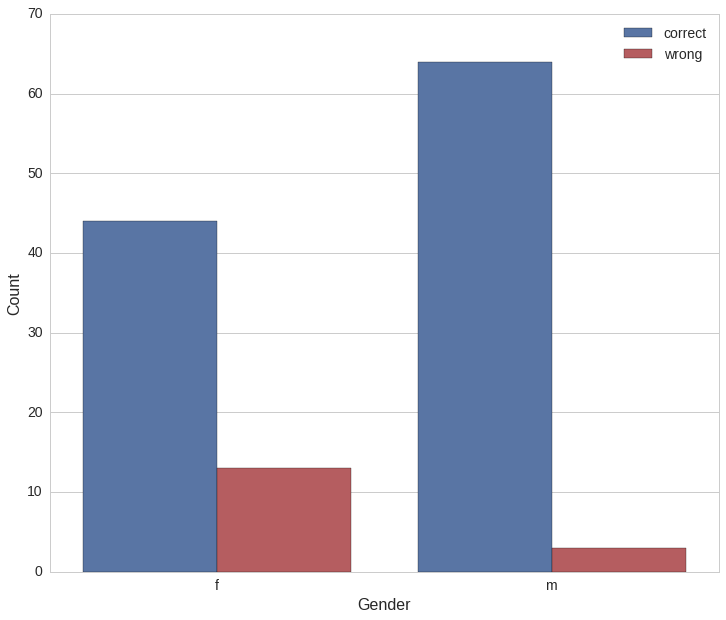

In [46]:
fig, ax = plt.subplots(figsize=(12,10))
sns.countplot(x='Prediction', hue='Class', data=y, palette=[palette[0], palette[2]])
ax.legend(
   loc='best',
   fontsize=14)
ax.tick_params(labelsize=14)
plt.xlabel('Gender', fontsize=16)
plt.ylabel('Count', fontsize=16);

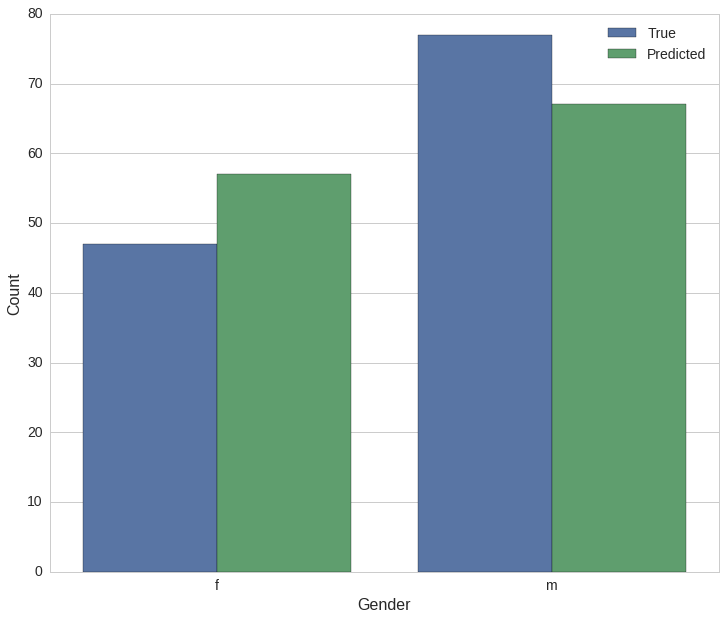

In [47]:
fig, ax = plt.subplots(figsize=(12,10))
sns.countplot(x='Gender', hue='Label', data=plotter)
ax.legend(
   loc='best',
   fontsize=14)
ax.tick_params(labelsize=18)
plt.xlabel('Gender', fontsize=20)
plt.ylabel('Count', fontsize=16);

## Sentiment

In [462]:
sentiment_cols = df_dict['aubonheurdesdames_sentiment_nosolo'].columns
sentiment_cols

Index(['Character', 'Label', 'Pos_count', 'Pos_prob', 'Neg_count', 'Neg_prob',
       'Neut_count', 'Neut_prob'],
      dtype='object')

In [467]:
sentiment_names

['sentiment_nosolo', 'sentiment_solo']

In [575]:
stacked_sent = pd.DataFrame(columns=sentiment_cols)
name = sentiment_names[0]
for book in books:
    key = book + '_' + name
    stacked_sent = stacked_sent.append(df_dict[key])

In [576]:
def div_total(df):
    df['Total_count'] = df['Pos_count'] + df['Neg_count'] + df['Neut_count']
    temp = df[['Pos_count', 'Neg_count', 'Neut_count']].div(df.Total_count, axis=0)
    df.Pos_count = temp.Pos_count
    df.Neg_count = temp.Neg_count
    df.Neut_count = temp.Neut_count

In [577]:
div_total(stacked_sent)

In [556]:
pos = stacked_sent.Pos_count.to_frame()
neg = stacked_sent.Neg_count.to_frame()
neut = stacked_sent.Neut_count.to_frame()
pos.columns = ['Count']
neg.columns = ['Count']
neut.columns = ['Count']


pos['Sentiment'] = 'Pos'
neg['Sentiment'] = 'Neg'
neut['Sentiment'] = 'Neut'

In [557]:
pos = pos.append(neg).append(neut)

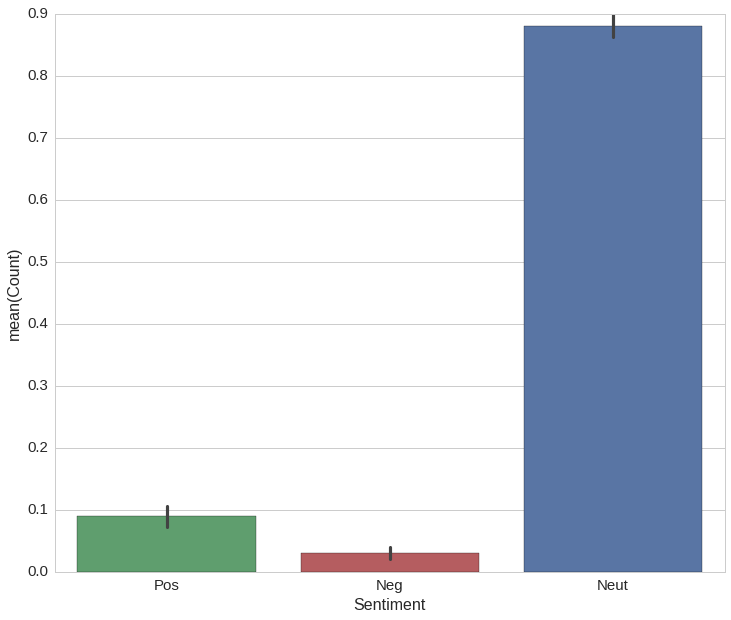

In [558]:
ax, fig = plt.subplots(figsize=(12,10))
sns.barplot(x='Sentiment', y='Count', data=pos, palette=[palette[1], palette[2], palette[0]])
plt.xlabel('Sentiment', fontsize=16)
plt.ylabel('mean(Count)', fontsize=16);

In [579]:
abdd_top = pd.read_csv('metadata/aubonheurdesdames_sentiment_nosolo_top.csv')
div_total(abdd_top)

In [580]:
abdd_top[['Character', 'Label', 'Pos_count', 'Neg_count', 'Neut_count', 'Total_count']]

,Character,Label,Pos_count,Neg_count,Neut_count,Total_count
0,Denise,pos,0.074364,0.048924,0.876712,511.0
1,Mouret,pos,0.097561,0.043360,0.859079,369.0
2,Hutin,neutral,0.032258,0.032258,0.935484,124.0
3,Bourdoncle,pos,0.085470,0.042735,0.871795,117.0


In [578]:
stacked_sent[['Character', 'Label', 'Pos_count', 'Neg_count', 'Neut_count', 'Total_count']].head(10)

,Character,Label,Pos_count,Neg_count,Neut_count,Total_count
0,Denise,neutral,0.058824,0.058824,0.882353,51.0
1,Mouret,pos,0.222222,0.055556,0.722222,36.0
2,Hutin,neutral,0.000000,0.000000,1.000000,12.0
3,Bourdoncle,neutral,0.000000,0.000000,1.000000,11.0
4,MmeDesforges,pos,0.200000,0.000000,0.800000,10.0
5,Baudu,neutral,0.000000,0.000000,1.000000,10.0
6,MmeAurélie,neutral,0.100000,0.100000,0.800000,10.0
7,Pauline,pos,0.300000,0.000000,0.700000,10.0
8,Favier,neutral,0.000000,0.000000,1.000000,10.0
9,Robineau,pos,0.200000,0.000000,0.800000,10.0


### Tourdumonde

In [570]:
load_frames()

In [571]:
tdm_top = pd.read_csv('metadata/letourdumondeen80jours_sentiment_nosolo_top.csv')
div_total(tdm_top)

In [572]:
tdm_top[['Character', 'Label', 'Pos_count', 'Neg_count', 'Neut_count', 'Total_count']]

,Character,Label,Pos_count,Neg_count,Neut_count,Total_count
0,Passepartout,pos,0.106965,0.037313,0.855721,402.0
1,PhileasFogg,pos,0.092857,0.017857,0.889286,280.0
2,MrFogg,pos,0.049242,0.011364,0.939394,264.0
3,Fix,pos,0.071713,0.035857,0.892430,251.0
4,MrsAouda,pos,0.062016,0.038760,0.899225,129.0


In [573]:
tdm = df_dict['letourdumondeen80jours_sentiment_nosolo']
div_total(tdm)
tdm.head()

      Character Label  Pos_count   Pos_prob  Neg_count   Neg_prob  Neut_count  \
0  Passepartout   pos        5.0  19.637560        0.0  20.362440        35.0   
1   PhileasFogg   pos        3.0  13.642083        1.0  14.357917        24.0   
2        MrFogg   pos        1.0  12.511667        0.0  13.488333        25.0   
3           Fix   pos        2.0  11.602000        1.0  13.398000        22.0   
4      MrsAouda   neg        1.0   5.898333        2.0   6.101667         9.0   

   Neut_prob  
0  34.087500  
1  22.708333  
2  22.768333  
3  19.806667  
4   8.950000  


,Character,Label,Pos_count,Pos_prob,Neg_count,Neg_prob,Neut_count,Neut_prob,Total_count
0,Passepartout,pos,0.125000,19.637560,0.000000,20.362440,0.875000,34.087500,40.0
1,PhileasFogg,pos,0.107143,13.642083,0.035714,14.357917,0.857143,22.708333,28.0
2,MrFogg,pos,0.038462,12.511667,0.000000,13.488333,0.961538,22.768333,26.0
3,Fix,pos,0.080000,11.602000,0.040000,13.398000,0.880000,19.806667,25.0
4,MrsAouda,neg,0.083333,5.898333,0.166667,6.101667,0.750000,8.950000,12.0
